# Lab 2 - Classification and Fitting with Neural Networks in Tensorflow


In this notebook, you will be introduced to tensorflow. We will

-  perform function fitting with neural networks (Part A)
-  perform classification on handwritten digits using Tensorflow (Part B)

Complete the code where appropriate according to the instructions (see comments)

Your are free to tweak the hyper-parameters (including number of hidden units, number of hidden layers, learning rate, num of iterations and so on) to improve the performance of the model. 

Make sure that your final submission is a notebook that can be run from beginning to end

For Part A: You should try to get pretty close to the ground truth function where requested. 

For Part B: The submitted prediction accuracy on testing set, should be > 60%. It is in fact easy to achieve >95% of the accuracy on this dataset with careful tuning of hyper-parameters. **Your grade will depend on the final prediction accuracy**. 

In [2]:
import tensorflow as tf
from collections import deque
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
tf.__version__ # Make sure you have version >2

'2.8.0'

# Short Experiments with Tensors
No Code is necessary in this section

In [4]:
# Let's create a random tensor 
t = tf.random.uniform([2,3],-1,3)
t # t.shape -> (2,3)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.3168497 ,  0.19580221, -0.45945168],
       [ 0.515223  ,  2.760387  , -0.96913624]], dtype=float32)>

In [5]:
5*(t**2+10) # Tensor arithmetic

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[58.670464, 50.191692, 51.05548 ],
       [51.32728 , 88.09868 , 54.696125]], dtype=float32)>

In [6]:
t.numpy() # convert to numpy

array([[ 1.3168497 ,  0.19580221, -0.45945168],
       [ 0.515223  ,  2.760387  , -0.96913624]], dtype=float32)

# Part A: Function fitting using Neural Networks 

## Fit a Simple Linear Function
- No need to change anything in this subsection
- Read the code and understand what is happening

- In this part you will see how to use tensorflow to implement a simple linear regression 

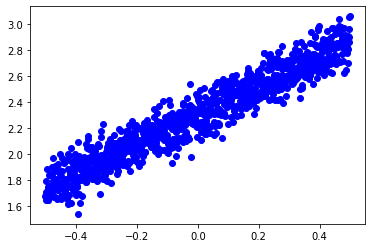

In [7]:
# No code changes are necessary here but feel free to experiment
true_a = 1.13
true_b = 2.3
datapoints =  1000
noise_intensity = 0.1
data_x = (np.arange(datapoints) / (datapoints) - .5).astype(np.float32) # Chainer assumes all the cpu computation is done in float32
data_y = (data_x * true_a + true_b + np.random.randn(*data_x.shape) * noise_intensity).astype(np.float32)
_ = plt.scatter(data_x, data_y, c='b')

In [8]:
from tensorflow.keras import Input
from tensorflow.keras import layers,Model

model = tf.keras.Sequential()
model.add(layers.Dense(1,input_shape=[1])) # no activation function here

In [9]:
model.compile(optimizer="Adam", loss="mse")
# NOTE during your experimentation you can use verbose=1 or 2, but for final result you can use verbose=0
history = model.fit(data_x,data_y,epochs=250,verbose=0) 

In [10]:
model.layers # Observe the layers

In [11]:
model.layers[0].weights # Observe the weights learned

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.1275605]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([2.3020275], dtype=float32)>]

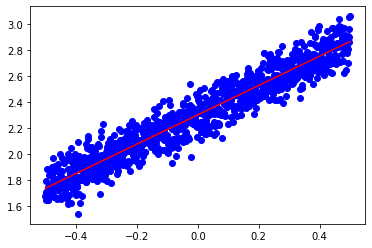

In [12]:
plt.scatter(data_x, data_y, c='b')
plt.plot(data_x, model.predict(data_x).T[0],c='r')

## Fit a nonlinear function using Neural Networks 

- In this part you will write code that fits the dataset below.
- The ground truth is a sinusoidal function but there is noise added
- you should implement a slightly more complicated model than before. 

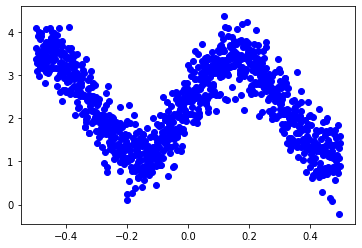

In [13]:
# no need to change anything here
# this generates the data
freq = 10
noise_intensity = 0.4
data_y2 = ( np.sin(freq*data_x) * true_a + true_b + np.random.randn(*data_x.shape) * noise_intensity).astype(np.float32)
_ = plt.scatter(data_x, data_y2, c='b')

- implement the neural network model in the following cell
- to do that you can experiment with various methods. You can try to put more than one layers. Experiment with the number of parameters per layer as well. 
- you will need to use some activation function to introduce nonlinearity in your neural network. 
- to introduce nonlinearity you can use the parameter activation="relu" in a Dense layer for example. There are other activation functions you can try as well

In [14]:
model = tf.keras.Sequential()
model.add(layers.Dense(30,input_shape=[1]))
model.add(layers.ReLU())
model.add(layers.Dense(1))

In [15]:
model.compile(optimizer="Adam", loss="mse")

In [16]:
history = model.fit(data_x,data_y2,epochs=250,verbose=1) # fit your model

Epoch 1/250
32/32 [==============================] - 0s 3ms/step - loss: 5.8523
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 5.1276
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 4.3835
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 3.6072
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 2.8353
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 2.1216
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 1.5418
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 1.1501
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 0.9386
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8438
Epoch 11/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8109
Epoch 12/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7985
Epoch 13/250
32/32 [=================

In [17]:
model.layers # Notice how many dense layers we have now

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 30)                60        
                                                                 
 re_lu (ReLU)                (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


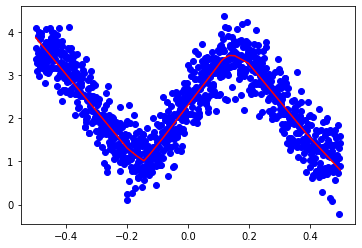

In [19]:
# overlay answer and data
# NOTE: your result should be close to the ground truth function (sinusoidal function)
plt.scatter(data_x, data_y2, c='b')
plt.plot(data_x, model.predict(data_x).T[0],c='r')  

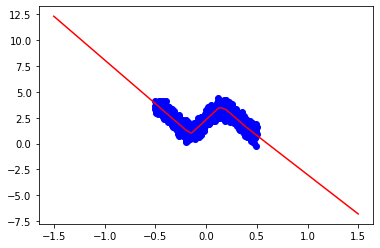

In [20]:
# How does your model extrapolate? 
# -> It's okay if it doesn't extrapolate
plt.scatter(data_x, data_y2, c='b')
plt.plot(data_x-1, model.predict(data_x-1).T[0],c='r') 
plt.plot(data_x, model.predict(data_x).T[0],c='r') 
plt.plot(data_x+1, model.predict(data_x+1).T[0],c='r') 

In [21]:
# OPTIONAL Question 
# - Create your dataset based on teh function of your choice (logarithmic, root, exponential etc)
# - Your dataset for X can be different than a uniform grid, say for example uniform distribution, normal distribution etc
# - does your model interpolate well? does it extrapolate well?

# Part B: Classification using Neural Networks

In this part we build a model for image classification. 
We will use the MNIST hand written digit dataset, which is a toy benchmark for image
classification models. First load the dataset via TensorFlow API.

Here $X_{train},Y_{train}$ denote the training data and $X_{test},Y_{test}$ denote the testing data. We train the model on training set and evaluate its performance on testing set (to evaluate potential under-fitting or over-fitting). As can be seen below, $X_{train}$ contains a lot of examples with $28 \times 28 $ pixels. $Y_{train}$ contains the corresponding labels (i.e. the $10$ classes). 

In [22]:
mnist = tf.keras.datasets.mnist.load_data(path="mnist.npz") # Dataset

In [23]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [24]:
X_train = X_train/255.0 # Normalize your data
X_test  = X_test/255.0 

5


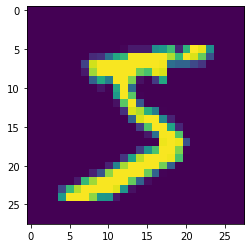

In [25]:
# Print an image and its label
plt.imshow(X_train[0])
print(Y_train[0])

In [26]:
# TODO: Create a simple Model to predict the label of a digit with one dense layer
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=[28,28]))
model.add(layers.Dense(10))
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy",metrics=['accuracy'])
history = model.fit(X_train,Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3383 - accuracy: 0.4258 - val_loss: 2.2743 - val_accuracy: 0.4324
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2520 - accuracy: 0.4388 - val_loss: 2.2455 - val_accuracy: 0.4411
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1758 - accuracy: 0.4373 - val_loss: 2.1918 - val_accuracy: 0.4316
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1969 - accuracy: 0.4248 - val_loss: 2.1854 - val_accuracy: 0.4345
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1893 - accuracy: 0.4290 - val_loss: 2.1840 - val_accuracy: 0.4371
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1874 - accuracy: 0.3942 - val_loss: 2.1854 - val_accuracy: 0.3571
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1966 - accuracy: 0.3455 - val_loss: 2.2024 - val_accuracy:

In [27]:
model.evaluate(X_test,Y_test) # Evaluate your results

313/313 [==============================] - 1s 3ms/step - loss: 2.1802 - accuracy: 0.3404


[2.180231809616089, 0.34040001034736633]

In [28]:
# TODO: Create a more complicated model with more than one layers
# and evaluate your model on the test set
# try to improve the performance compared to the previous model


model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=[28,28]))
model.add(layers.Dense(200))
model.add(layers.ReLU())
model.add(layers.Dense(10))
model.compile(optimizer="Adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(X_train,Y_train, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2347 - accuracy: 0.9331 - val_loss: 0.1204 - val_accuracy: 0.9626
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0991 - accuracy: 0.9704 - val_loss: 0.0913 - val_accuracy: 0.9714
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0662 - accuracy: 0.9798 - val_loss: 0.0706 - val_accuracy: 0.9782
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0476 - accuracy: 0.9849 - val_loss: 0.0820 - val_accuracy: 0.9736
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0709 - val_accuracy: 0.9792
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0275 - accuracy: 0.9915 - val_loss: 0.0772 - val_accuracy: 0.9771
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0220 - accuracy: 0.9932 - val_loss: 0.0791 - val_accuracy:

In [29]:
# model.evaluate(X_test,Y_test) # Evaluate your results
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0935 - accuracy: 0.9811


[0.0934801995754242, 0.9811000227928162]

In [30]:
# Optional question
# Identify digits that your model mispredicts, and display them. 